In [21]:
# regression - technique of finding relationship between two or more variables.
# lesser the value of r^2(goodness of fit) greater is the error.
# (1 - (SEline/ SEy_mean)) = r^2 = Goodness of fit | least square error method

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Estimated Coefficients : 
m = 137.72727272727272
c = -7.5


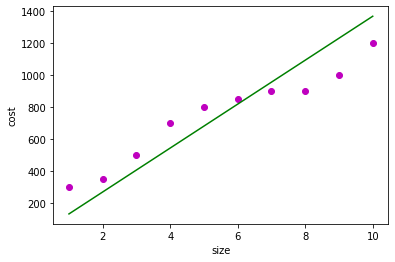

In [3]:
# univariate

def estimate_coefficients(x, y):
    n = np.size(x)
    mean_x, mean_y = np.mean(x), np.mean(y)
    ss_xy = np.sum(y*x - n*mean_y*mean_x)
    ss_xx = np.sum(x*x - n*mean_x*mean_x)
    m = ss_xy / ss_xx
    c = mean_y - m * mean_x
    return m, c


def plot_regression_line(x, y, m, c):
    plt.scatter(x, y, color='m', marker='o')
    y_pred = m*x + c
    plt.plot(x, y_pred, color='g')
    plt.xlabel('size')
    plt.ylabel('cost')
    plt.show()

    
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([300,350,500,700,800,850,900,900,1000,1200])

m, c = estimate_coefficients(x, y)
print("Estimated Coefficients : \nm = {}\nc = {}".format(m, c))
plot_regression_line(x, y, m, c)

In [4]:
# using LinearRegression sklearn
data = pd.read_csv('res/boston_housing_data.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.shape

(506, 14)

In [6]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
req_data = data.loc[:,['lstat','medv']]
req_data.head()

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


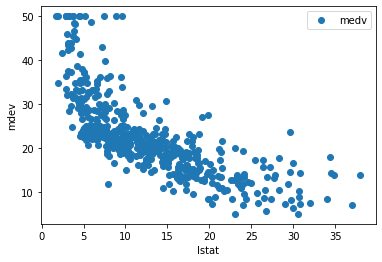

In [8]:
data.plot(x='lstat', y='medv', style='o')
plt.xlabel('lstat')
plt.ylabel('mdev')
plt.show()

In [9]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Univariate

In [10]:
x = pd.DataFrame(data['lstat'])
y = pd.DataFrame(data['medv'])
x.size, y.size

(506, 506)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(404, 1)
(404, 1)
(102, 1)
(102, 1)


In [12]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print(regressor.intercept_)
print(regressor.coef_)

[34.33497839]
[[-0.92441715]]


In [ ]:
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred

In [ ]:
plt.plot(x_test, y_pred)
plt.scatter(x_test, y_test, color='orange')

In [ ]:
print('Mean Absolute Error', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

### Multivariate

In [ ]:
data = pd.read_csv('res/boston_housing_data.csv')
data.head()

In [ ]:
x = pd.DataFrame(data.iloc[:,:-1])
y = pd.DataFrame(data.iloc[:,-1])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
regressor.fit(x_train, y_train)

In [ ]:
# coefficient for each attribute
y_pred = regressor.predict(x_test)
v = pd.DataFrame(regressor.coef_, index=['Co-efficients']).transpose()
v

In [ ]:
w = pd.DataFrame(x.columns, columns=['Attribute'])
w

In [15]:
w = pd.DataFrame(x.columns, columns=['Attribute'])
w

,Predicted
0,27.374117
1,27.697663
2,16.955936
3,26.847199
4,24.915168
...,...
97,26.791734
98,30.507891
99,22.317555
100,19.830873


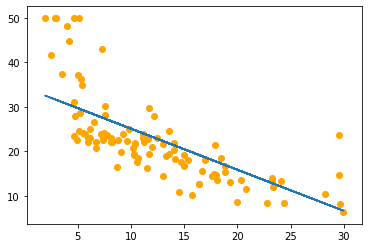

In [20]:
plt.plot(x_test, y_pred)
plt.scatter(x_test, y_test, color='orange')

In [23]:
print('Mean Absolute Error', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error 5.078127727696938
Mean Squared Error 46.99482091954711
Root Mean Squared Error 6.855276866731723


### Multivariate

In [33]:
data = pd.read_csv('res/boston_housing_data.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [53]:
x = pd.DataFrame(data.iloc[:,:-1])
y = pd.DataFrame(data.iloc[:,-1])

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [48]:
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
# coefficient for each attribute
y_pred = regressor.predict(x_test)
v = pd.DataFrame(regressor.coef_, index=['Co-efficients']).transpose()
v

,Co-efficients
0,-0.130800
1,0.049403
2,0.001095
3,2.705366
4,-15.957050
5,3.413973
6,0.001119
7,-1.493081
8,0.364422
9,-0.013172


In [61]:
w = pd.DataFrame(x.columns, columns=['Attribute'])
w

,Attribute
0,crim
1,zn
2,indus
3,chas
4,nox
5,rm
6,age
7,dis
8,rad
9,tax
